In [18]:
import pandas as pd
import json
import os
import numpy as np

from tqdm import tqdm

In [19]:
root_dir = "./data"

In [50]:
info = json.load(open(root_dir+f"/user_tweets/1000075712_tweets.json"))
len(info)

299

In [20]:
tweet_url_mentions = pd.DataFrame()

for filename in tqdm(os.listdir(root_dir+"/tweets")[1:]):
    user_id = filename.split("_")[0]
    json_data = json.load(open(root_dir + f"/tweets/{filename}"))

    # data = {
    #     "user": [json_data["author_id"]],
    #     "tweet_id": [json_data["id"]],
    #     "article_link": [json_data["created_at"]],
    #     "url": [json_data["entities"]["urls"][0]["expanded_url"]],
    #     "possible_sensitive": [json_data["possibly_sensitive"]],
    #     "text": [json_data["text"]]
    # }

    # create empty dictionary
    data = {
        "user": [],
        "tweet_id": [],
        "datetime": [],
        "url": [],
        "possible_sensitive": [],
        "text": []
    }

    for tweet in json_data:
        if tweet["lang"] == "en":
            data["user"].append(tweet["author_id"])
            data["tweet_id"].append(tweet["id"])
            data["datetime"].append(tweet["created_at"])
            try:
                data["url"].append(tweet["entities"]["urls"][0]["expanded_url"])
            except:
                data["url"].append("")
            data["possible_sensitive"].append(tweet["possibly_sensitive"])
            data["text"].append(tweet["text"])

    tweet_url_mentions = pd.concat((
        tweet_url_mentions, 
        pd.DataFrame(data)
    ))

tweet_url_mentions["datetime"] = pd.to_datetime(tweet_url_mentions["datetime"]).map(pd.Timestamp.timestamp).astype(int)

100%|██████████| 966/966 [00:02<00:00, 419.95it/s]


In [21]:
tweet_url_mentions.to_csv("./mentioner.csv", index=False)

In [55]:
tweets_df = pd.DataFrame()

for filename in tqdm(os.listdir(root_dir+"/user_tweets")[1:]):
    user_id = filename.split("_")[0]
    json_data = json.load(open(root_dir + f"/user_tweets/{filename}"))

    # data = {
    #     "user": [json_data["author_id"]],
    #     "tweet_id": [json_data["id"]],
    #     "article_link": [json_data["created_at"]],
    #     "url": [json_data["entities"]["urls"][0]["expanded_url"]],
    #     "possible_sensitive": [json_data["possibly_sensitive"]],
    #     "text": [json_data["text"]]
    # }

    # create empty dictionary
    data = {
        "user": [],
        "tweet_id": [],
        "article_link": [],
        "url": [],
        "possible_sensitive": [],
        "text": []
    }

    for tweet in json_data:
        if tweet["lang"] == "en":
            data["user"].append(tweet["author_id"])
            data["tweet_id"].append(tweet["id"])
            data["article_link"].append(tweet["created_at"])
            try:
                data["url"].append(tweet["entities"]["urls"][0]["expanded_url"])
            except:
                data["url"].append("")
            data["possible_sensitive"].append(tweet["possibly_sensitive"])
            data["text"].append(tweet["text"])

    tweets_df = pd.concat((
        tweets_df, 
        pd.DataFrame(data)
    ))

  1%|          | 20/3382 [00:00<00:17, 192.25it/s]C:\Users\vedan\AppData\Local\Temp/ipykernel_15068/145712598.py:38: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  tweets_df = pd.concat((
100%|██████████| 3382/3382 [02:08<00:00, 26.31it/s]


In [65]:
tweets_df.to_csv("./tweets_df.csv", index=False)

In [17]:
misinfo_dict = json.load(open("./data/misinfo_url.json"))

In [20]:
urls, uuids = [], []

for item in tqdm(misinfo_dict):
    urls.append(item['url'])
    uuids.append(item['uuid'])

100%|██████████| 1000/1000 [00:00<00:00, 501171.47it/s]


In [23]:
misinfo_data = pd.DataFrame({
    "url": urls,
    "uuid": uuids
})

misinfo_data
# misinfo_data.to_csv("./misinfo_urls.csv", index=False)

,url,uuid
0,https://sputniknews.com/20220331/putin-western...,9d34851c-6236-48a1-9d82-d5667a87e3b3
1,https://sputniknews.com/20220331/peskov-says-u...,2abacf44-3a8a-49f5-ac8a-699554694d02
2,https://www.rt.com/news/553021-us-china-chokin...,e8ada23d-e1aa-4455-acd9-09d2ee7b624f
3,https://www.rt.com/russia/553055-putin-zelensk...,d523bd7d-69a5-45b2-bcb8-71b085847a5f
4,https://www.rt.com/russia/553049-kremlin-putin...,8eb626d9-c672-4c81-a213-b61d17690053
...,...,...
995,https://sputniknews.com/20220318/uk-media-regu...,521d1495-354f-4284-91a6-816c100207e4
996,https://www.rt.com/russia/552221-lavrov-biolab...,b46480b8-15b9-4544-b5d6-80f36d3dbc84
997,https://www.rt.com/sport/552246-ufc-nikita-kry...,1f3ab2d8-3fae-4661-a58f-eedcf07dc57e
998,https://www.rt.com/business/552224-india-buys-...,f8130f19-72bc-4b8c-ad1c-0d8a971d397b


In [1]:
import pandas as pd
import json
import os
import numpy as np

from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

In [2]:
misinfo_data = pd.read_csv("./misinfo_urls.csv")
tweets_df = pd.read_csv("./tweets_df.csv")

In [3]:
tweets_df["datetime"] = pd.to_datetime(tweets_df["article_link"]).map(pd.Timestamp.timestamp).astype(int)

In [4]:
import networkx as nx

In [5]:
graph = nx.Graph()

In [22]:
for user in tqdm(tweet_url_mentions["user"].unique()):
    user_shared_links = tweet_url_mentions[tweet_url_mentions["user"] == user]["url"].unique()

    for link in user_shared_links:
        # find all users who shared this link with in 60 seconds of the user
        users_who_shared_link = tweet_url_mentions[
            (tweet_url_mentions["url"] == link) &
            (tweet_url_mentions["user"] != user) &
            (tweet_url_mentions["datetime"] - tweet_url_mentions[tweet_url_mentions["user"] == user]["datetime"].values[0] < 60)
        ]["user"].unique()

        for user_who_shared_link in users_who_shared_link:
            graph.add_edge(user, user_who_shared_link)


 13%|█▎        | 357/2732 [00:33<03:43, 10.62it/s]


KeyboardInterrupt: 

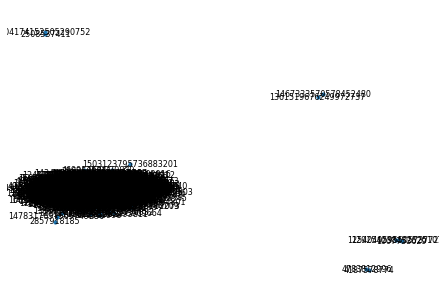

In [14]:
# plot graph
nx.draw(graph, with_labels=True, node_size=10, font_size=8)

In [15]:
graph.adjacency()

In [7]:
# save the graph
nx.write_gpickle(graph, "./graph.gpickle")

In [57]:
for url in tqdm(tweets_df["url"].unique()):
    subset = tweets_df[tweets_df["url"] == url]
    subset = subset.drop_duplicates(subset="user")

    if len(subset) > 1:
        times = np.array([subset["datetime"].to_list()])
        delta = pd.DataFrame(np.absolute(times - times.T), index=subset["user"].unique(), columns=subset["user"].unique())
        delta = (delta <= 60).astype(int)
        delta = (delta != 0).astype(int)

        xs, ys = np.where(delta == 1)
        for x, y in zip(xs, ys):
            if x != y:
                a = subset["user"].to_list()[x]
                b = subset["user"].to_list()[y]

                if a not in groups[url]:
                    groups[url][a] = groups[url].get(a, 0) + 1
                if b not in groups[url]:
                    groups[url][b] = groups[url].get(b, 0) + 1

                # check the activity of the two users
                user_A_tweets = tweets_df[(tweets_df["user"] == a)].dropna(subset=["url"])
                user_B_tweets = tweets_df[(tweets_df["user"] == b)].dropna(subset=["url"])

                # user_A_tweets = user_A_tweets[user_A_tweets["url"] != url]
                # user_B_tweets = user_B_tweets[user_B_tweets["url"] != url]

                if len(user_A_tweets) > 0 and len(user_B_tweets) > 0:
                    break


  0%|          | 36/167539 [00:00<1:16:45, 36.37it/s]


KeyError: 'https://twitter.com/RaheemKassam/status/1579166075476115456/photo/1'

In [37]:
common_urls

Series([], dtype: float64)

In [74]:
tweets_df["datetime"] = pd.to_datetime(tweets_df["article_link"]).map(pd.Timestamp.timestamp).astype(int)

In [88]:
subset

,user,tweet_id,article_link,url,possible_sensitive,text,datetime
35,1007493413443440640,1509531223512674313,2022-03-31T14:01:04.000Z,https://sputniknews.com/20220331/putin-western...,0.0,Putin is not playing games!!!!!\nPutin: Existi...,1648735264
32,521800579,1509978150922604552,2022-04-01T19:36:59.000Z,https://sputniknews.com/20220331/putin-western...,0.0,Seems the West is getting a taste of its own m...,1648841819
